<a href="https://colab.research.google.com/github/jannat226/pytorch-deep-learning/blob/main/01__PyTorch_Fundamentals_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#PyTorch workflow
import torch
from torch import nn
import matplotlib.pyplot as plt



In [29]:
##Preparing and loading the data

##ML 1-> Get data in numerical form and 2-> build a model to find pattern


We will use linear regression formula to make straight line with known parameters

In [30]:
#creating known parameters
weights = 0.7
bias = 0.3
#create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weights * X + bias
Y
X[:10],Y[:10],len(X), len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [31]:
#Splitting data in training and testing
train_split = int(0.8 * len(X)) # 80% data
train_split
X_train,Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train),len(Y_test),len(X_test),len(Y_test)

(40, 10, 10, 10)

In [32]:
X_train,Y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [33]:
def plot_predictions(train_data= X_train, train_label = Y_train, test_data = X_test, test_label = Y_test,predictions = None):
  """Plots training data , test data and compares predictions"""
  plt.figure(figsize= (10,7))
  plt.scatter(train_data,train_label,c="b",s=4,label= "training data")

  #plot test data
  plt.scatter(test_data, test_label, c="g", s=4 , label = "test data")
  #are there predictions
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s="4",label="predicted")

    #legend
    plt.legend(prop={"size":4 })

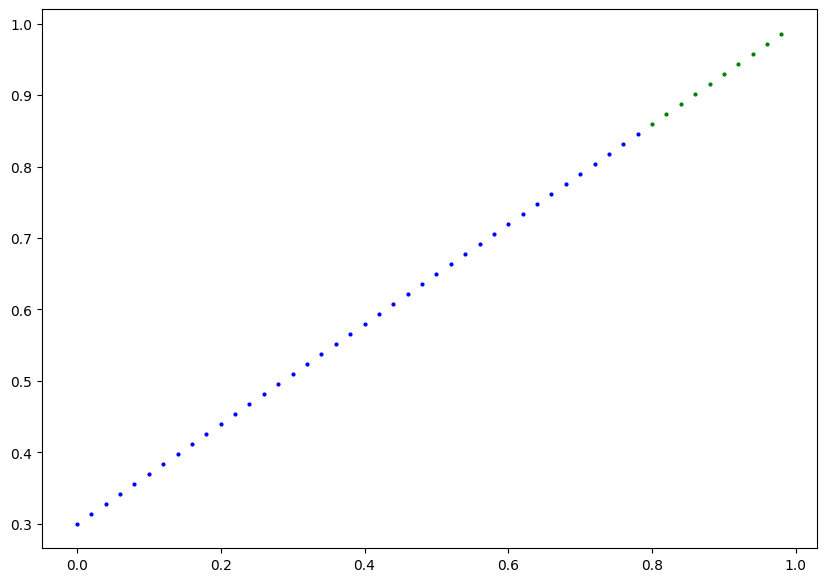

In [34]:
plot_predictions()

In [35]:
#building model using pytorch
import torch
import torch.nn as nn
class LinearRegressionModel(nn.Module):#Almost everything in pytorch inherites from nn module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad= True, dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,dtype = float))

  #Forward method to define  the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:#x is the input data in our case it is training data
    return self.weights * x + self.bias# this is linear regression formula

In [ ]:
#PyTorch model building essential
#computational graph is similar to neural networks -> NN can be considered as computational graph

In [36]:
##Checking the contents of our model
##checking the parametersor what's  inside our model using .parameters

#Creating a seed
torch.manual_seed(2)
#This ensures that your results are reproducible across different runs.


#creating an instance of  the model (this is subclass of nn.Module)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3923], requires_grad=True),
 Parameter containing:
 tensor([-0.2236], dtype=torch.float64, requires_grad=True)]

In [37]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3923])),
             ('bias', tensor([-0.2236], dtype=torch.float64))])

In [40]:
weights, bias

(0.7, 0.3)

In [44]:
# Turn model into evaluation mode
model_0.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([-0.3489, -0.6963,  0.1862, -0.4720,  0.0013], dtype=torch.float64)

In [42]:
# # Use model.eval() to set the model in evaluation mode
# model_0.eval()

# # Sample data (e.g., X_test) for prediction
# X_test = torch.randn(5)  # Random test data (you can replace it with real data)

# # Use torch.no_grad() to make predictions without calculating gradients
# with torch.no_grad():
#     y_preds = model_0(X_test)  # Make predictions

# # Print predictions
# print("Predictions:", y_preds)

Predictions: tensor([-0.3489, -0.6963,  0.1862, -0.4720,  0.0013], dtype=torch.float64)


##Training the model -> the model move from "Unknown" parameters to know ones
**Note -> loss function can be called as cost functionor criterion in different areas

**Loss function -> measure how wrong is the prediction of our model**
**Optimizer -> Takes into account the loss of  a model and adjusts the model's parameters(e.g weights and bias)**


**We need ⁉Training and testing loop**

In [46]:
#Train Model
list(model_0.parameters())
##Setting up loss and optimizer function

[Parameter containing:
 tensor([0.3923], requires_grad=True),
 Parameter containing:
 tensor([-0.2236], dtype=torch.float64, requires_grad=True)]

In [47]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3923])),
             ('bias', tensor([-0.2236], dtype=torch.float64))])

**LOSS FUN AND OPTIMIZER**

In [65]:
loss_fn = nn.L1Loss()

#set up optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),lr=0.1) #lr -> learning rate

In [93]:
#Tracking of values
epoch_count = []
loss_values = []
test_loss_values = []

###Building the training and testing loop

**0.Loop through data**
**1.Forward PASS ->Forward propagation**
**2.Calculate the loss **
**3.Optimizer zero grad**
**4.Loss backward**


In [109]:
##An epoch is one loop through the data ..
epochs = 100


##Training
# 0. Loop through the data
for epoch in range(epochs):
  #set the model  to training model
  model_0.train()#set all parameter that require  gradient true
  # 1. Forward pass
  y_pred = model_0(X_train)
  # 2. Calculate the loss
  loss = loss_fn(y_pred,Y_train)
  print(f"Loss: {loss}")
  # 3.  Optimizer zero grad
  optimizer.zero_grad()
  # 4. Loss backward
  loss.backward()
  # 5. Optimizer step
  optimizer.step()



  ###Testing Loop
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, Y_test)
    print(f"Test loss: {test_loss}")
  epoch_count.append(epoch)
  loss_values.append(loss)
  test_loss_values.append(test_loss)

  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

model_0.eval()#turns off gradient tracking

Loss: 0.056864664120984496
Test loss: 0.7101744322213278
Epoch: 0 | Train loss: 0.056864664120984496 | Test loss: 0.7101744322213278
Loss: 0.05834532610661045
Test loss: 0.6598867707190589
Loss: 0.056864664120984496
Test loss: 0.7101744322213278
Loss: 0.05834532610661045
Test loss: 0.6598867707190589
Loss: 0.056864664120984496
Test loss: 0.7101744322213278
Loss: 0.05834532610661045
Test loss: 0.6598867707190589
Loss: 0.056864664120984496
Test loss: 0.7101744322213278
Loss: 0.05834532610661045
Test loss: 0.6598867707190589
Loss: 0.056864664120984496
Test loss: 0.7101744322213278
Loss: 0.05834532610661045
Test loss: 0.6598867707190589
Loss: 0.056864664120984496
Test loss: 0.7101744322213278
Loss: 0.05834532610661045
Test loss: 0.6598867707190589
Loss: 0.056864664120984496
Test loss: 0.7101744322213278
Loss: 0.05834532610661045
Test loss: 0.6598867707190589
Loss: 0.056864664120984496
Test loss: 0.7101744322213278
Loss: 0.05834532610661045
Test loss: 0.6598867707190589
Loss: 0.056864664120

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:128: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


LinearRegressionModel()

In [110]:
epoch_count,loss_values,test_loss_values

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,


In [111]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6370])),
             ('bias', tensor([0.3814], dtype=torch.float64))])

In [112]:
# import numpy as np
# np.array(torch.tensor(loss_values)).cpu().numpy()
# loss_values_np = np.array(loss_values)  # Simply convert the list to NumPy array
# Assuming loss_values is a list of PyTorch tensors
loss_values_np = np.array([loss.detach().numpy() for loss in loss_values])  # Detach and convert to NumPy



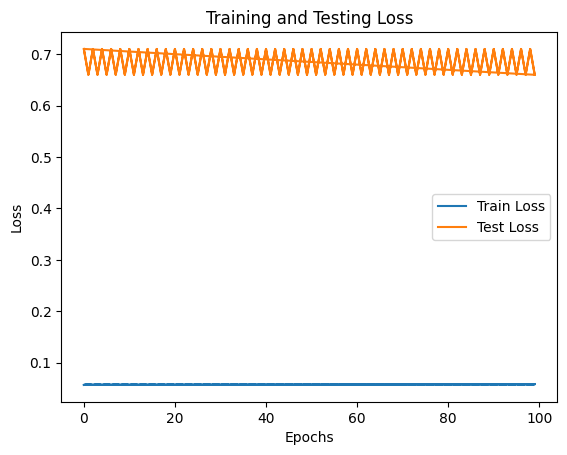

In [113]:
# Plot the loss curves
plt.plot(epoch_count, loss_values_np, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and Testing Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

#saving model
1.   torch.save()
2.   toch.load(_
3.   torch.nn.Module.load_state_dict()





In [115]:
#saving model
model_0.state_dict()

OrderedDict([('weights', tensor([0.6370])),
             ('bias', tensor([0.3814], dtype=torch.float64))])

In [116]:
#Saving our pytorch model
from pathlib import Path

#1.create  model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#1. Create model save path
Model_name = "01_pytorch_workflow.pth"
model_save_path = MODEL_PATH / Model_name